Environment Set Up

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
DATA_PATH = kagglehub.dataset_download('andrewmvd/medical-mnist')

print('Data source import complete.')

100%|██████████| 84.8M/84.8M [00:01<00:00, 52.8MB/s]

Extracting files...


Data source import complete.


In [ ]:
# Verify file download.

print(DATA_PATH)

import os
for dirname, _, filenames in os.walk(DATA_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Part 1 - Standard

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [6]:
# Step 1: Load and Preprocess the Dataset - Load images and labels
def load_data(data_path):
    images, labels = [], []
    class_labels = os.listdir(data_path)
    class_map = {label: idx for idx, label in enumerate(class_labels)}

    for label in class_labels:
        folder_path = os.path.join(data_path, label)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))  # Resize to 28x28
            images.append(img)
            labels.append(class_map[label])

    return np.array(images), np.array(labels), class_map

images, labels, class_map = load_data(DATA_PATH)

In [7]:
# Normalize images
images = images / 255.0  # Normalize to [0, 1]
images = images.reshape(-1, 28, 28, 1)  # Add channel dimension

In [8]:
# Convert labels to categorical
num_classes = len(class_map)
labels = to_categorical(labels, num_classes=num_classes)

In [9]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

In [11]:
# Step 2: Design the Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Step 3: Train the Model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1290/1290 ━━━━━━━━━━━━━━━━━━━━ 58s 43ms/step - accuracy: 0.8884 - loss: 0.3259 - val_accuracy: 0.9976 - val_loss: 0.0100
Epoch 2/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 57s 44ms/step - accuracy: 0.9923 - loss: 0.0268 - val_accuracy: 0.9989 - val_loss: 0.0044
Epoch 3/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9950 - loss: 0.0195 - val_accuracy: 0.9991 - val_loss: 0.0035
Epoch 4/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9951 - loss: 0.0177 - val_accuracy: 0.9989 - val_loss: 0.0049
Epoch 5/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.9951 - loss: 0.0165 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 6/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 7/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 8/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 54s 42ms/step - accuracy: 0.9964 - loss: 0.01

In [13]:
# Step 4: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

277/277 - 3s - 12ms/step - accuracy: 0.9997 - loss: 0.0018
Test Accuracy: 1.00


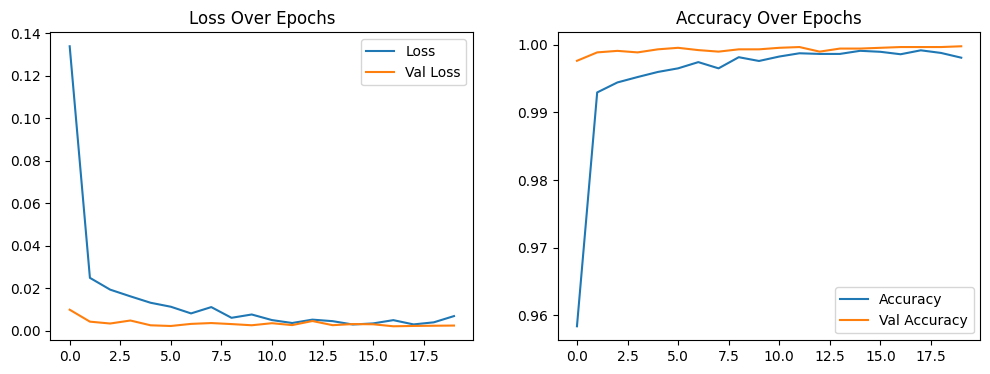

In [14]:
# Step 5: Visualize Training Metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

PART 2 - Cross Validation Implementation

In [20]:
# Implement K-Fold Cross-Validation

from sklearn.model_selection import KFold

In [16]:
# Step 1: Prepare the dataset (Ensure images and labels are preloaded)
images = images.reshape(-1, 28, 28, 1)  # Reshape to include channels
labels = np.argmax(labels, axis=1)  # Convert one-hot to class labels for KFold

In [17]:
# Step 2: Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

In [19]:
for train_idx, val_idx in kfold.split(images):
    print(f"Training Fold {fold_no}...")

    # Split data into training and validation sets for the current fold
    X_train, X_val = images[train_idx], images[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Convert labels back to one-hot encoding for Keras
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_val = tf.keras.utils.to_categorical(y_val, num_classes)

    # Step 3: Define the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Step 4: Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=10,  # Use fewer epochs for quick testing
                        batch_size=32,
                        verbose=1)

    # Step 5: Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold_no} - Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Save results for this fold
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)

    fold_no += 1

Training Fold 1...
Epoch 1/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.9199 - loss: 0.2390 - val_accuracy: 0.9980 - val_loss: 0.0065
Epoch 2/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9959 - loss: 0.0175 - val_accuracy: 0.9983 - val_loss: 0.0058
Epoch 3/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9972 - loss: 0.0107 - val_accuracy: 0.9992 - val_loss: 0.0020
Epoch 4/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9992 - val_loss: 0.0020
Epoch 5/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 6/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9986 - val_loss: 0.0058
Epoch 7/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 48s 33ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9995 - val_loss: 0.0023
Epoch 8/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step -

In [22]:
# Step 6: Aggregate Results
mean_accuracy = np.mean(fold_accuracies)
mean_loss = np.mean(fold_losses)
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Loss: {mean_loss:.4f}")


Cross-Validation Results:
Mean Accuracy: 0.9992
Mean Loss: 0.0037
